In [1]:
from models import Dim
from datasets import coil2000
import datetime
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## Dimensionality Reduction

In [2]:
data = coil2000()
dim = Dim(data.train, data.test, data.col_names)
dim.unpickle_dim('dim/03-23-20:18.pkl')
#dim.apply_dim(num_dim=5)
#dim.pickle_dim(datetime.now().strftime('%m-%d-%H:%M'))

('5Dim', 'LLE', 'k=68-reg=0.001'): 100%|██████████| 1/1 [01:32<00:00, 92.84s/it]


In [16]:
df = dim.lol_model(n=3)
len(df[0])

2

In [4]:
df = dim.get_corr_table(5)

('5Dim', 'SLMVP', 'Polynomial-Order=5')
('5Dim', 'SLMVP', 'Linear')
('5Dim', 'SLMVP', 'Radial-Gammas=0.01')
('5Dim', 'SLMVP', 'Radial-Gammas=0.1')
('5Dim', 'SLMVP', 'Radial-Gammas=1')
('5Dim', 'SLMVP', 'Radial-Gammas=10')
('5Dim', 'PCA', '')
('5Dim', 'KPCA', 'Linear')
('5Dim', 'KPCA', 'Polynomial')
('5Dim', 'KPCA', 'Radial')
('5Dim', 'LOL', '')
('5Dim', 'LPP', 'k=68')
('5Dim', 'LLE', 'k=68-reg=0.001')


In [55]:
for key in dim.new_dim.keys():
    if 5 == int(key[0][0]):
        print(key[0])
        #int(key[0][0])

5Dim
5Dim
5Dim
5Dim
5Dim
5Dim
5Dim
5Dim
5Dim
5Dim
5Dim
5Dim
5Dim


In [13]:
pca_eigenvals = dim.new_dim[('5Dim', 'PCA', '')][3]
por_eigenvals = [x/sum(pca_eigenvals) for x in pca_eigenvals]
var_dims = [np.var(dim.new_dim[('5Dim', 'PCA', '')][0][i]) for i in range(5)]

In [41]:
# Cluster features
scaler = MinMaxScaler()
scaled_X_T = scaler.fit_transform(dim.X_train.T)
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
    )
label = kmeans.fit_predict(scaled_X_T)
print(label)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 1 0 2 1 0 2 2 2 1 2 2 1 2 0 0 2 2 2 2
 2 2 1 0 1 1 1 2 2 1 2 2 1 2 0 0 1 1 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [42]:
for l in label:
    print(l)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
0
0
0
0
0
0
0
0
0
0
0
1
0
2
1
0
2
2
2
1
2
2
1
2
0
0
2
2
2
2
2
2
1
0
1
1
1
2
2
1
2
2
1
2
0
0
1
1
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [ ]:
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])

In [3]:
dim.apply_clf()

1Dim-SLMVP-Polynomial-Order=5:   0%|          | 0/65 [00:00<?, ?it/s]

XGBoost


50Dim-LLE-k=68-reg=0.001: 100%|██████████| 65/65 [1:35:32<00:00, 88.20s/it]       


In [4]:
dim.get_corr_table()

,1Dim-SLMVP-Polynomial-Order=5,1Dim-SLMVP-Linear,1Dim-SLMVP-Radial-Gammas=0.01,1Dim-SLMVP-Radial-Gammas=0.1,1Dim-SLMVP-Radial-Gammas=1,1Dim-SLMVP-Radial-Gammas=10,1Dim-PCA,1Dim-KPCA-Linear,1Dim-KPCA-Polynomial,1Dim-KPCA-Radial,1Dim-LOL,1Dim-LPP-k=68,1Dim-LLE-k=68-reg=0.001
"Subtype: High Income, expensive child",0.012815,0.012815,0.012815,0.012815,0.012815,0.012815,-0.277364,-0.277364,0.285236,0.163012,0.253576,0.040777,-0.283976
Subtype: Very Important Provincials,0.029436,0.029436,0.029436,0.029436,0.029436,0.029436,-0.102705,-0.102705,0.094690,0.063029,0.086328,0.154727,-0.130805
Subtype: High status seniors,-0.021140,-0.021140,-0.021140,-0.021140,-0.021140,-0.021140,-0.097144,-0.097144,0.099796,0.104740,0.097410,-0.110267,-0.086266
Subtype: Affluent senior apartments,-0.006582,-0.006582,-0.006582,-0.006582,-0.006582,-0.006582,-0.024958,-0.024958,0.024709,0.019825,0.034589,-0.054416,-0.021627
Subtype: Mixed seniors,0.052214,0.052214,0.052214,0.052214,0.052214,0.052214,0.020044,0.020044,-0.020623,-0.020554,-0.025043,0.012623,0.012902
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Number of surfboard policies,0.011298,0.011298,0.011298,0.011298,0.011298,0.011298,-0.029084,-0.029084,0.026839,0.024835,0.022143,-0.001570,-0.033783
Number of boat policies,-0.011058,-0.011058,-0.011058,-0.011058,-0.011058,-0.011058,-0.027424,-0.027424,0.027477,0.029433,0.035589,0.000955,-0.016240
Number of bicycle policies,-0.008162,-0.008162,-0.008162,-0.008162,-0.008162,-0.008162,-0.055640,-0.055640,0.055869,0.049159,0.041708,0.002554,-0.055960
Number of property insurance policies,-0.022252,-0.022252,-0.022252,-0.022252,-0.022252,-0.022252,-0.016623,-0.016623,0.016035,0.007742,0.025018,0.002473,-0.021741


In [11]:
import pandas as pd

df = pd.DataFrame.from_dict(dim.scores, orient='index', columns=['Best Score', 'Params']).reset_index()
df[['Model', 'Dimensions', 'Dim. Technique', 'Dim. Params']] = df["index"].str.split("-", n = 3, expand = True)
df

,index,Best Score,Params,Model,Dimensions,Dim. Technique,Dim. Params
0,XGBoost-1Dim-SLMVP-Polynomial-Order=5,0.930472,{'xgb__n_estimators': 5},XGBoost,1Dim,SLMVP,Polynomial-Order=5
1,XGBoost-1Dim-SLMVP-Linear,0.930472,{'xgb__n_estimators': 5},XGBoost,1Dim,SLMVP,Linear
2,XGBoost-1Dim-SLMVP-Radial-Gammas=0.01,0.930472,{'xgb__n_estimators': 5},XGBoost,1Dim,SLMVP,Radial-Gammas=0.01
3,XGBoost-1Dim-SLMVP-Radial-Gammas=0.1,0.930472,{'xgb__n_estimators': 5},XGBoost,1Dim,SLMVP,Radial-Gammas=0.1
4,XGBoost-1Dim-SLMVP-Radial-Gammas=1,0.930472,{'xgb__n_estimators': 5},XGBoost,1Dim,SLMVP,Radial-Gammas=1
...,...,...,...,...,...,...,...
60,XGBoost-50Dim-KPCA-Polynomial,0.927039,{'xgb__n_estimators': 5},XGBoost,50Dim,KPCA,Polynomial
61,XGBoost-50Dim-KPCA-Radial,0.927039,{'xgb__n_estimators': 5},XGBoost,50Dim,KPCA,Radial
62,XGBoost-50Dim-LOL,0.927039,{'xgb__n_estimators': 10},XGBoost,50Dim,LOL,None
63,XGBoost-50Dim-LPP-k=68,0.926180,{'xgb__n_estimators': 10},XGBoost,50Dim,LPP,k=68


In [13]:
df.sort_values('Best Score').groupby('Dim. Technique', as_index=False).first()

,Dim. Technique,index,Best Score,Params,Model,Dimensions,Dim. Params
0,KPCA,XGBoost-50Dim-KPCA-Radial,0.927039,{'xgb__n_estimators': 5},XGBoost,50Dim,Radial
1,LLE,XGBoost-50Dim-LLE-k=68-reg=0.001,0.928755,{'xgb__n_estimators': 10},XGBoost,50Dim,k=68-reg=0.001
2,LOL,XGBoost-50Dim-LOL,0.927039,{'xgb__n_estimators': 10},XGBoost,50Dim,None
3,LPP,XGBoost-50Dim-LPP-k=68,0.926180,{'xgb__n_estimators': 10},XGBoost,50Dim,k=68
4,PCA,XGBoost-10Dim-PCA,0.928755,{'xgb__n_estimators': 10},XGBoost,10Dim,None
5,SLMVP,XGBoost-10Dim-SLMVP-Radial-Gammas=0.1,0.924464,{'xgb__n_estimators': 10},XGBoost,10Dim,Radial-Gammas=0.1


In [19]:
x = 'XGBoost-1Dim-KPCA-Linear'
x[8:]

'1Dim-KPCA-Linear'

In [20]:
best_performing = df[df.Dimensions == '1Dim'].sort_values('Best Score')\
    .groupby('Dim. Technique', as_index=False)\
    .first()['index'].to_list()
best_performing = [x[8:] for x in best_performing]

best_performing

['1Dim-KPCA-Linear',
 '1Dim-LLE-k=68-reg=0.001',
 '1Dim-LOL',
 '1Dim-LPP-k=68',
 '1Dim-PCA',
 '1Dim-SLMVP-Polynomial-Order=5']

In [22]:
dim.get_corr_table()[best_performing].to_csv('corr_1dim')

In [9]:
df.groupby(['Dim. Technique']).max('Best Score')

,Best Score
Dim. Technique,
KPCA,0.931330
LLE,0.930472
LOL,0.930472
LPP,0.930472
PCA,0.930472
SLMVP,0.931330


In [40]:
len(dim.new_dim['5Dim-SLMVP-Polynomial-Order=5'][0][0])

4657

In [44]:
for i in range(1):
    print(i)

0


In [49]:
# Load the data into a Pandas df
df = pd.DataFrame(dim.X_train, columns=data.col_names[:-1])

for key in dim.new_dim.keys():
    # Add the principal components as columns
    for i in range(1):
        df[key] = dim.new_dim[key][0][i]

# Correlations between the original data and each principal component
df.corr().iloc[:len(dim.X_train[0]), len(dim.X_train[0]):]


,5Dim-SLMVP-Polynomial-Order=5,5Dim-SLMVP-Linear,5Dim-SLMVP-Radial-Gammas=0.01,5Dim-SLMVP-Radial-Gammas=0.1,5Dim-SLMVP-Radial-Gammas=1,5Dim-SLMVP-Radial-Gammas=10,5Dim-PCA,5Dim-KPCA-Linear,5Dim-KPCA-Polynomial,5Dim-KPCA-Radial,...,50Dim-SLMVP-Radial-Gammas=0.1,50Dim-SLMVP-Radial-Gammas=1,50Dim-SLMVP-Radial-Gammas=10,50Dim-PCA,50Dim-KPCA-Linear,50Dim-KPCA-Polynomial,50Dim-KPCA-Radial,50Dim-LOL,50Dim-LPP-k=68,50Dim-LLE-k=68-reg=0.001
"Subtype: High Income, expensive child",-0.027320,-0.027287,-0.027135,-0.027135,-0.027202,-0.027231,-0.277364,-0.277364,0.285236,0.163012,...,-0.008150,-0.008522,-0.008566,-0.277364,-0.277364,0.285236,0.163012,0.253576,0.041982,0.283976
Subtype: Very Important Provincials,-0.024847,-0.024853,-0.024797,-0.024786,-0.024818,-0.024833,-0.102705,-0.102705,0.094690,0.063029,...,0.015514,0.015660,0.015666,-0.102705,-0.102705,0.094690,0.063029,0.086328,0.155653,0.130805
Subtype: High status seniors,0.196022,0.195951,0.196003,0.196034,0.196006,0.195988,-0.097144,-0.097144,0.099796,0.104740,...,0.056921,0.056615,0.056607,-0.097144,-0.097144,0.099796,0.104740,0.097410,-0.108463,0.086266
Subtype: Affluent senior apartments,0.110882,0.110835,0.110862,0.110885,0.110864,0.110854,-0.024958,-0.024958,0.024709,0.019825,...,0.063793,0.063733,0.063743,-0.024958,-0.024958,0.024709,0.019825,0.034589,-0.053619,0.021627
Subtype: Mixed seniors,-0.004636,-0.004689,-0.004701,-0.004678,-0.004681,-0.004686,0.020044,0.020044,-0.020623,-0.020554,...,0.010313,0.010174,0.010152,0.020044,0.020044,-0.020623,-0.020554,-0.025043,0.013388,-0.012902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Number of surfboard policies,-0.027915,-0.027909,-0.027899,-0.027903,-0.027903,-0.027905,-0.029084,-0.029084,0.026839,0.024835,...,-0.015771,-0.015786,-0.015796,-0.029084,-0.029084,0.026839,0.024835,0.022143,-0.001077,0.033783
Number of boat policies,-0.004830,-0.004812,-0.004794,-0.004803,-0.004804,-0.004804,-0.027424,-0.027424,0.027477,0.029433,...,-0.013055,-0.013003,-0.012987,-0.027424,-0.027424,0.027477,0.029433,0.035589,-0.001623,0.016240
Number of bicycle policies,0.011099,0.011105,0.011123,0.011123,0.011115,0.011108,-0.055640,-0.055640,0.055869,0.049159,...,0.030267,0.030214,0.030204,-0.055640,-0.055640,0.055869,0.049159,0.041708,-0.000057,0.055960
Number of property insurance policies,0.009237,0.009257,0.009271,0.009264,0.009260,0.009261,-0.016623,-0.016623,0.016035,0.007742,...,0.004935,0.004968,0.004972,-0.016623,-0.016623,0.016035,0.007742,0.025018,0.002337,0.021741


In [3]:
dim.apply_clf()

5Dim-SLMVP-Polynomial-Order=5:   0%|          | 0/39 [00:00<?, ?it/s]

XGBoost


50Dim-LLE-k=68-reg=0.001: 100%|██████████| 39/39 [06:28<00:00,  9.97s/it]      


In [4]:
import pickle
with open('scores_07-03' + '.pkl', 'wb') as f:
    pickle.dump(dim.scores, f)

In [7]:
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier

xgb_pipe = Pipeline([('mms', MinMaxScaler()),
                     ('xgb', XGBClassifier())])

params = [{'xgb__n_estimators': [10, 20, 50, 100, 200]}]

gs_xgb = GridSearchCV(xgb_pipe,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)

for key in dim.new_dim.keys():
    print(key)
    gs_xgb.fit(dim.new_dim[key][0].T, dim.y_train)
    print(gs_xgb.best_params_)
    # find best model score
    print(gs_xgb.score(dim.new_dim[key][1].T, dim.y_test))

5Dim-SLMVP-Polynomial-Order=5
{'xgb__n_estimators': 10}
0.9287553648068669
5Dim-SLMVP-Linear
{'xgb__n_estimators': 10}
0.9313304721030042
5Dim-SLMVP-Radial-Gammas=0.01
{'xgb__n_estimators': 10}
0.9287553648068669
5Dim-SLMVP-Radial-Gammas=0.1


KeyboardInterrupt: 

In [14]:
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error

model = XGBClassifier(n_estimators=10)
for key in dim.new_dim.keys():
#    if ('PCA' not in key) & ('LOL' not in key) & ('LPP' not in key) & ('LLE' not in key)
    print(key)
    model.fit(dim.new_dim[key][0].T, dim.y_train)
    y_test_pred = model.predict(dim.new_dim[key][1].T)
    print(mean_squared_error(dim.y_test, y_test_pred))

5Dim-SLMVP-Polynomial-Order=5
0.07124463519313305
5Dim-SLMVP-Linear
0.06866952789699571
5Dim-SLMVP-Radial-Gammas=0.01
0.07124463519313305
5Dim-SLMVP-Radial-Gammas=0.1
0.06952789699570816
5Dim-SLMVP-Radial-Gammas=1
0.06952789699570816
5Dim-SLMVP-Radial-Gammas=10
0.07124463519313305
5Dim-PCA
0.06952789699570816
5Dim-KPCA-Linear


XGBoostError: [20:43:10] /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/data/data.cc:455: Check failed: this->labels.Size() % this->num_row_ == 0 (2 vs. 0) : Incorrect size for labels.
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x000000012696d105 dmlc::LogMessageFatal::~LogMessageFatal() + 117
  [bt] (1) 2   libxgboost.dylib                    0x0000000126a02aaa xgboost::MetaInfo::SetInfoFromHost(xgboost::GenericParameter const&, xgboost::StringView, xgboost::Json) + 4282
  [bt] (2) 3   libxgboost.dylib                    0x0000000126a01902 xgboost::MetaInfo::SetInfo(xgboost::GenericParameter const&, xgboost::StringView, xgboost::StringView) + 146
  [bt] (3) 4   libxgboost.dylib                    0x0000000126983509 XGDMatrixSetInfoFromInterface + 233
  [bt] (4) 5   libffi.dylib                        0x00007ff82d9e0882 ffi_call_unix64 + 82
  [bt] (5) 6   ???                                 0x00007ff7bae75740 0x0 + 140701969372992



In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

data = coil2000()
scaler = MinMaxScaler()
scaler.fit(data.train)
train = scaler.transform(data.train)

X = train[:, :-1]
y = train[:, -1]
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [15]:
for x in model.coef_:
    print(x)

-2591335048838.453
-2591335048838.41
-2591335048838.3643
-2591335048838.4434
-2591335048838.377
197795976476.6797
197795976476.54858
197795976476.73267
7019865129937.552
7019865129937.501
7019865129937.569
7019865129937.564
7019865129937.583
-1174592141893.4956
-43433427491.04883
-43433427491.10437
-43433427491.25281
-43433427491.16138
-43433427491.15759
9653939840868.434
9653939840868.334
9653939840868.387
9653939840868.36
9653939840868.367
1644547896675.4885
1644547896675.5383
1644547896675.4507
1644547896675.458
-14114957374275.475
-14114957374275.5
-14114957374275.455
-14114957374275.422
-20097489391.379242
-20097489391.458008
-20097489391.44043
-20097489391.38379
-20097489391.399414
4860526583694.543
4860526583694.512
3708059065929.2607
3708059065929.2725
0.01708984375
0.001220703125
0.046875
447416437006.7969
-2341714588308.275
-9163783741769.16
-2100485184340.434
-11797858452699.94
-3788466508507.0063
11971038762443.945
-2123821122440.1582
-7004445195526.092
-5851977677760.864
-

In [17]:
train = data.train
df_corr = df.corr().iloc[:len(self.X_train[0]), len(self.X_train[0]):]

NameError: name 'df' is not defined

In [21]:
import pandas as pd

df = pd.DataFrame(data.train, columns=data.col_names)
df_corr = df.corr().iloc[:len(data.train[0])-1, len(data.train[0])-1:]

In [23]:
df_corr.to_csv('corr_features_to_y.csv')

In [3]:
import numpy as np

# Generate a random dataset with 1000 samples and 10 features
data = np.random.rand(1000, 10)

# Add noise to the dataset
noise = np.random.normal(0, 0.1, (1000, 10))
data += noise


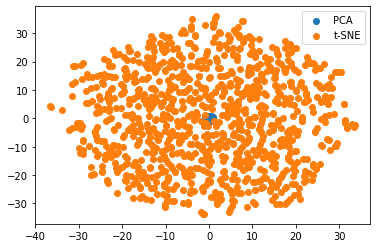

In [4]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Reduce the dimensionality of the dataset using PCA and t-SNE
pca = PCA(n_components=2)
tsne = TSNE(n_components=2, perplexity=30)
pca_data = pca.fit_transform(data)
tsne_data = tsne.fit_transform(data)

# Plot the results
import matplotlib.pyplot as plt
plt.scatter(pca_data[:,0], pca_data[:,1], label='PCA')
plt.scatter(tsne_data[:,0], tsne_data[:,1], label='t-SNE')
plt.legend()
plt.show()


# Artificial Dataset

- **n_samples** int, default=100
The number of samples.
- **n_features** int, default=20
The total number of features. These comprise n_informative informative features, n_redundant redundant features, n_repeated duplicated features and n_features-n_informative-n_redundant-n_repeated useless features drawn at random.
- **n_informative** int, default=2
The number of informative features. Each class is composed of a number of gaussian clusters each located around the vertices of a hypercube in a subspace of dimension n_informative. For each cluster, informative features are drawn independently from N(0, 1) and then randomly linearly combined within each cluster in order to add covariance. The clusters are then placed on the vertices of the hypercube.
- **n_redundant** int, default=2
The number of redundant features. These features are generated as random linear combinations of the informative features.
- **n_repeated** int, default=0
The number of duplicated features, drawn randomly from the informative and the redundant features.
- **n_classes** int, default=2
The number of classes (or labels) of the classification problem.
- **n_clusters_per_class** int, default=2
The number of clusters per class.
- **weights** array-like of shape (n_classes,) or (n_classes - 1,), default=None
The proportions of samples assigned to each class. If None, then classes are balanced. Note that if len(weights) == n_classes - 1, then the last class weight is automatically inferred. More than n_samples samples may be returned if the sum of weights exceeds 1. Note that the actual class proportions will not exactly match weights when flip_y isn’t 0.
- **flip_y** float, default=0.01
The fraction of samples whose class is assigned randomly. Larger values introduce noise in the labels and make the classification task harder. Note that the default setting flip_y > 0 might lead to less than n_classes in y in some cases.
- **class_sep** float, default=1.0
The factor multiplying the hypercube size. Larger values spread out the clusters/classes and make the classification task easier.
- **hypercube** bool, default=True
If True, the clusters are put on the vertices of a hypercube. If False, the clusters are put on the vertices of a random polytope.
- **shift** float, ndarray of shape (n_features,) or None, default=0.0
Shift features by the specified value. If None, then features are shifted by a random value drawn in [-class_sep, class_sep].
- **scale** float, ndarray of shape (n_features,) or None, default=1.0
Multiply features by the specified value. If None, then features are scaled by a random value drawn in [1, 100]. Note that scaling happens after shifting.
- **shuffle** bool, default=True
Shuffle the samples and the features.
- **random_state** int, RandomState instance or None, default=None
Determines random number generation for dataset creation. Pass an int for reproducible output across multiple function calls. See Glossary.

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=300, n_informative=4, n_redundant=296, random_state=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=33)


In [3]:
import pandas as pd

df = pd.read_csv('/Users/espina/Documents/TFM/tfm_code/dim/03-11-16:34.csv')

In [4]:
df

,Unnamed: 0,1Dim,1Dim.1,1Dim.2,1Dim.3,1Dim.4,1Dim.5,1Dim.6,1Dim.7,1Dim.8,...,10Dim.3,10Dim.4,10Dim.5,10Dim.6,10Dim.7,10Dim.8,10Dim.9,10Dim.10,10Dim.11,10Dim.12
0,NaN,SLMVP,SLMVP,SLMVP,SLMVP,SLMVP,SLMVP,PCA,KPCA,PCA,...,SLMVP,SLMVP,SLMVP,PCA,KPCA,PCA,PCA,LOL,LPP,LLE
1,NaN,Polynomial-Order=5,Linear,Radial-Gammas=0.01,Radial-Gammas=0.1,Radial-Gammas=1,Radial-Gammas=10,NaN,Linear,Polynomial,...,Radial-Gammas=0.1,Radial-Gammas=1,Radial-Gammas=10,NaN,Linear,Polynomial,Radial,NaN,k=68,k=68-reg=0.001
2,0.0,-0.012077803415335485,-0.012077803415335485,-0.012077803415335485,-0.012077803415335485,-0.012077803415335485,-0.012077803415335485,4.078100915006093,4.078100913721723,-2.156746132625506,...,0.013701314422311768,0.013701323922798889,0.013701199747448814,4.078100913734283,4.078100913721725,-2.1567461326255044,-0.15947325537625065,-2.469402711303352,2.4148797336156183e-10,0.0008408287578594334
3,1.0,-0.013946066246437468,-0.013946066246437468,-0.013946066246437468,-0.013946066246437468,-0.013946066246437468,-0.013946066246437468,-1.8006908600218734,-1.8006908576979161,0.8240777479159657,...,0.014659312459739518,0.014659071525622049,0.01465893787672389,-1.8006908576997411,-1.8006908576979148,0.8240777479159642,0.10762278692550371,12.54799808894918,6.30038686658471e-11,0.007885411953640944
4,2.0,-0.013754586507774481,-0.013754586507774481,-0.013754586507774481,-0.013754586507774481,-0.013754586507774481,-0.013754586507774481,0.5940201006044394,0.5940201073497716,-0.5560325661829676,...,0.01437219002666503,0.014372322313504885,0.014372273029910499,0.5940201073525628,0.5940201073497717,-0.5560325661829675,-0.042337761185843745,5.1608371085118545,9.671844015875556e-11,-0.0036306237123427615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4654,4652.0,-0.015215793153098896,-0.015215793153098896,-0.015215793153098896,-0.015215793153098896,-0.015215793153098896,-0.015215793153098896,-0.3927425448838451,-0.39274254072038517,-0.001587365355143199,...,0.014989050371748395,0.014989161668704114,0.014989134448575503,-0.39274254072680487,-0.3927425407203846,-0.001587365355143859,0.025328698509703682,9.303082422598173,7.394525016724126e-11,0.00025571044374803195
4655,4653.0,-0.014013567824654303,-0.014013567824654303,-0.014013567824654303,-0.014013567824654303,-0.014013567824654303,-0.014013567824654303,-14.814831251159317,-14.81483125849862,8.98699150348313,...,0.013958332958398465,0.01395792744270745,0.013957800250223694,-14.814831258499341,-14.814831258498613,8.986991503483125,0.31576991349594136,49.02995913422572,1.6673287494481582e-10,0.04358991445083689
4656,4654.0,-0.014913227563981286,-0.014913227563981286,-0.014913227563981286,-0.014913227563981286,-0.014913227563981286,-0.014913227563981286,-6.350537594845631,-6.350537604664009,3.9704463319706815,...,0.0153982710357982,0.015398450411179203,0.01539832417712705,-6.350537604660168,-6.350537604664007,3.9704463319706784,0.33079158085377885,28.597735746035,1.2821898495577145e-10,0.013624544781408897
4657,4655.0,-0.013909045965834725,-0.013909045965834725,-0.013909045965834725,-0.013909045965834725,-0.013909045965834725,-0.013909045965834725,-12.867068235493278,-12.867068226813805,7.533367908019578,...,0.014288733270985555,0.01428817695966096,0.014287980396467075,-12.867068226824218,-12.867068226813803,7.533367908019573,0.2988616014732761,39.92157695818723,1.2627554899255192e-10,0.04916572025423752
